In [5]:
import dill
from matplotlib import pyplot as plt
import gym

100%|██████████| 200000/200000 [00:12<00:00, 15794.05it/s]


[[0.50304571 0.39321509 0.39567182 0.39139627]
 [0.27440211 0.28900991 0.27782363 0.39546003]
 [0.36067285 0.35942823 0.36063841 0.36878928]
 [0.32629556 0.30518259 0.30603689 0.36042246]
 [0.51884682 0.28217295 0.28462028 0.27302737]
 [0.         0.         0.         0.        ]
 [0.29359004 0.29209966 0.30632534 0.27915175]
 [0.         0.         0.         0.        ]
 [0.30399234 0.3420107  0.33841417 0.55404968]
 [0.39510403 0.61322783 0.42797205 0.36178657]
 [0.58816085 0.53684478 0.45660306 0.40676697]
 [0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.4768637  0.56232766 0.72093796 0.53819511]
 [0.71780215 0.85744175 0.80048891 0.7460142 ]
 [0.         0.         0.         0.        ]]
[0 3 3 3 0 0 2 0 3 1 0 0 0 2 1 0]


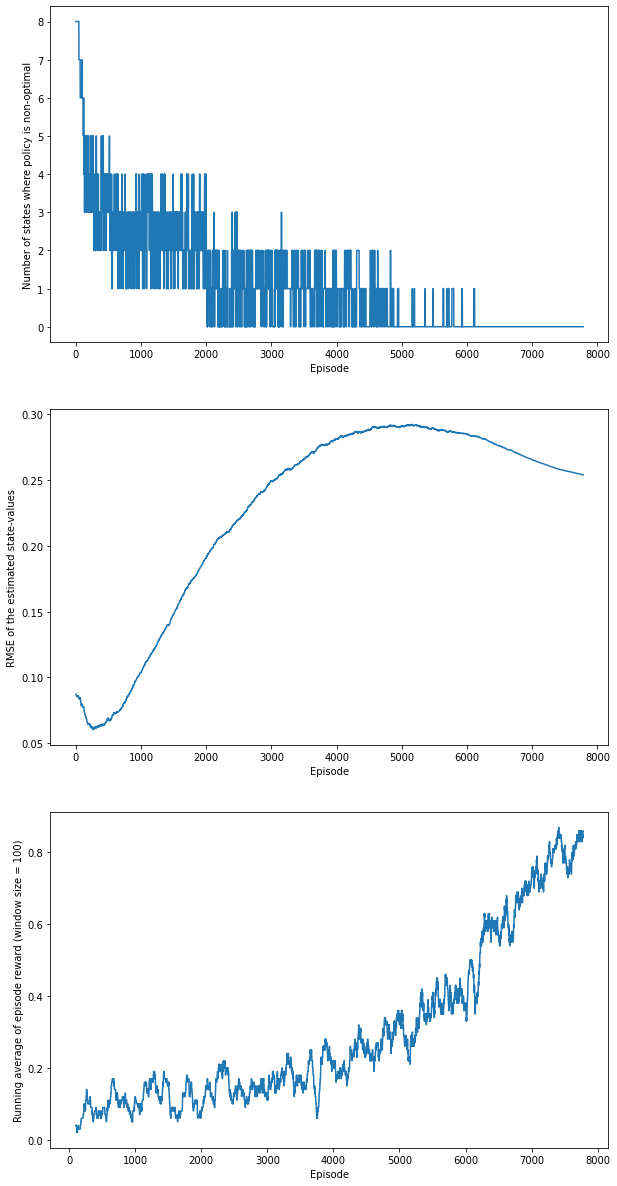

In [2]:
%run sarsa_training.py 4 200000

100%|██████████| 200000/200000 [00:14<00:00, 13699.57it/s]


[[0.4956167  0.39344448 0.39127444 0.39140043]
 [0.27502748 0.27809442 0.27505022 0.39558163]
 [0.36144513 0.36144168 0.36168489 0.37010893]
 [0.30138569 0.31346815 0.31721523 0.36136126]
 [0.50993072 0.28841847 0.27693783 0.26451062]
 [0.         0.         0.         0.        ]
 [0.30451401 0.29779173 0.30739278 0.2906701 ]
 [0.         0.         0.         0.        ]
 [0.27480364 0.32817363 0.30987763 0.54123704]
 [0.43781349 0.59600182 0.43844798 0.36605092]
 [0.56658757 0.52207126 0.49998183 0.45126305]
 [0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.48983885 0.53566196 0.70318491 0.51482779]
 [0.71587104 0.84651137 0.8038658  0.73509567]
 [0.         0.         0.         0.        ]]
[0 3 3 3 0 0 2 0 3 1 0 0 0 2 1 0]


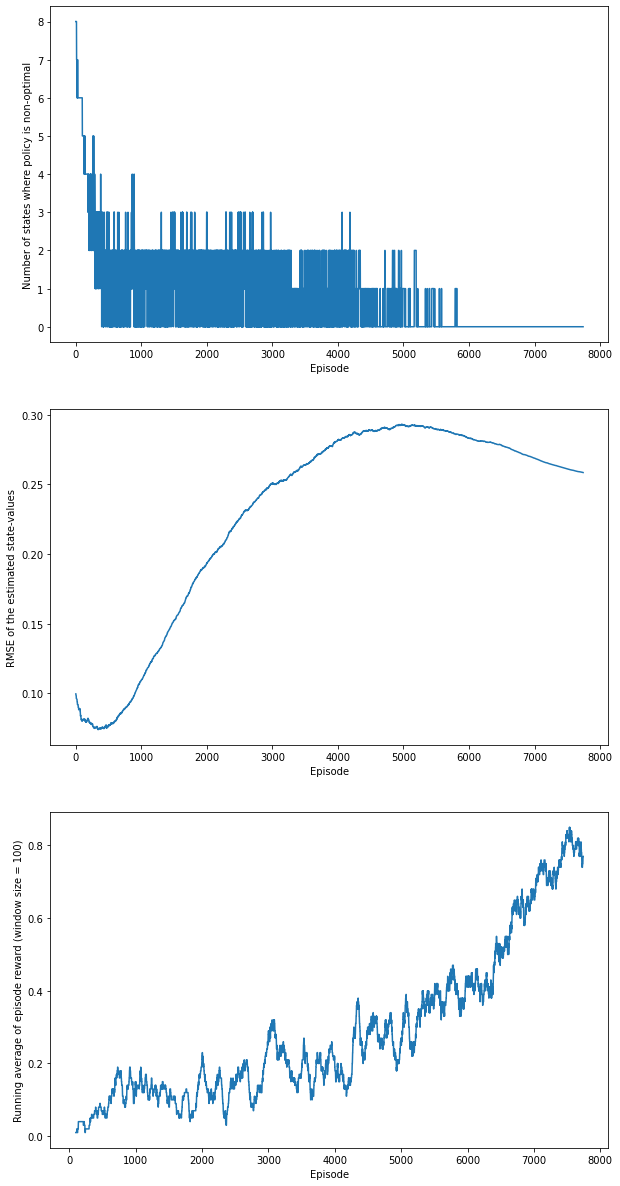

In [3]:
%run expected_sarsa_training.py 4 200000

100%|██████████| 200000/200000 [00:14<00:00, 13637.91it/s]


[[0.79275616 0.78879429 0.78833713 0.78835008]
 [0.52653061 0.54560907 0.52784781 0.78021435]
 [0.70578234 0.69438668 0.69440981 0.7689823 ]
 [0.52771497 0.50637682 0.48317918 0.75893902]
 [0.79276329 0.5595715  0.51363792 0.53036439]
 [0.         0.         0.         0.        ]
 [0.49542578 0.22617178 0.54848564 0.23588024]
 [0.         0.         0.         0.        ]
 [0.52167433 0.52336274 0.54432043 0.79282569]
 [0.55097901 0.79314546 0.517595   0.50078721]
 [0.73264798 0.5648521  0.49678203 0.46238238]
 [0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.59380613 0.6148141  0.85470918 0.52272564]
 [0.83259032 0.91864437 0.87122809 0.85475502]
 [0.         0.         0.         0.        ]]
[0 3 3 3 0 0 2 0 3 1 0 0 0 2 1 0]


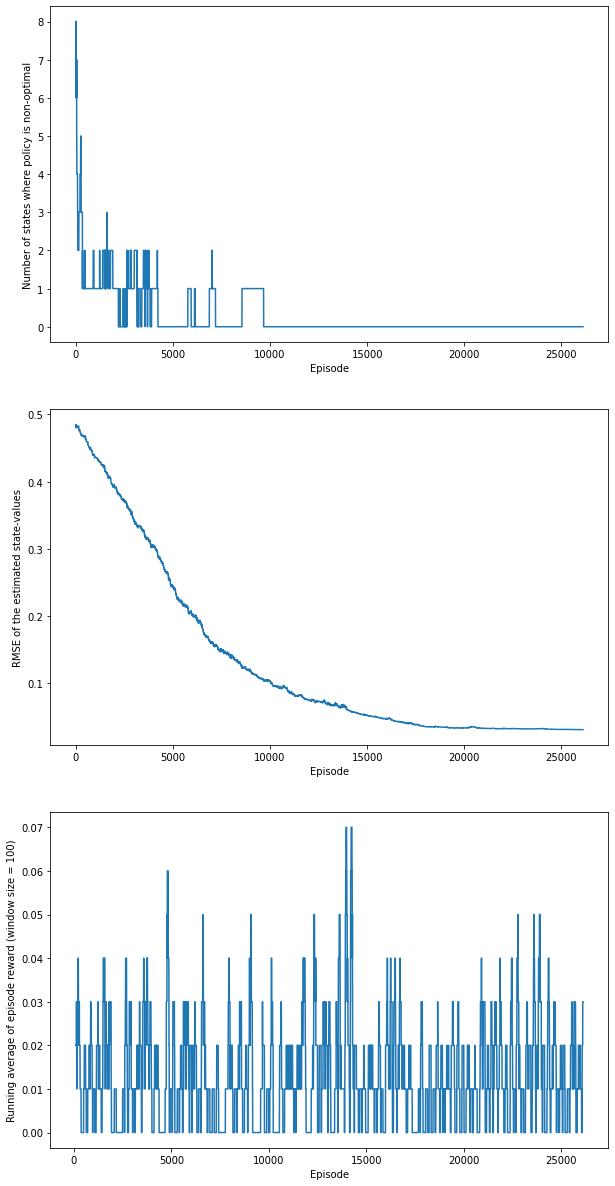

In [4]:
%run q_learning_training.py 4 200000

100%|██████████| 200000/200000 [00:15<00:00, 12929.37it/s]


[[0.8081322  0.8048893  0.80490649 0.80464368]
 [0.54267427 0.5157594  0.52768292 0.80272597]
 [0.69860136 0.69485057 0.70513559 0.79993728]
 [0.55214151 0.5200784  0.49462672 0.79894339]
 [0.80868744 0.54980598 0.54288468 0.53826317]
 [0.         0.         0.         0.        ]
 [0.49326512 0.23433036 0.48645339 0.22787778]
 [0.         0.         0.         0.        ]
 [0.52085811 0.5475234  0.55180496 0.80983147]
 [0.62495319 0.80919364 0.48167352 0.50669319]
 [0.74961481 0.62293835 0.50165003 0.46012341]
 [0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.5650837  0.60086046 0.8689438  0.59564509]
 [0.84275867 0.93423583 0.88281187 0.86389343]
 [0.         0.         0.         0.        ]]
[0 3 3 3 0 0 0 0 3 1 0 0 0 2 1 0]


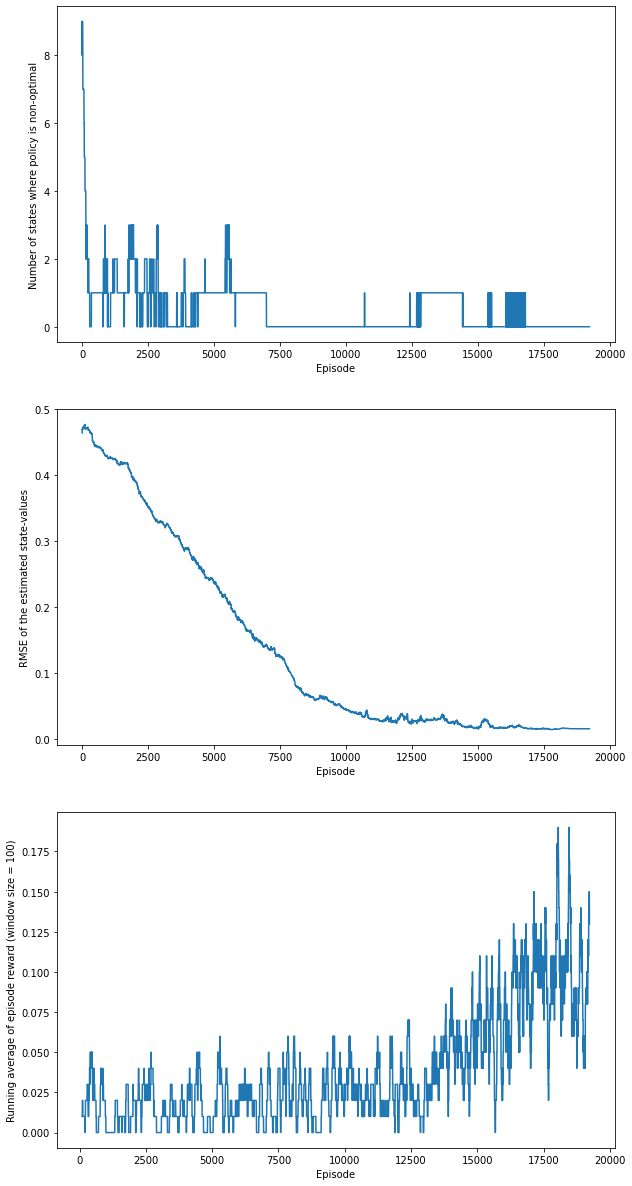

In [2]:
%run q_learning_eps_training.py 4 200000

In [6]:
# Fetch the agents that resulted from training in inference mode:
agents= {}
for alg in ('sarsa', 'expected_sarsa', 'q_learning', 'q_learning_eps'):
    with open(f'{alg}_agent.dill', 'rb') as fopen:
        agents[alg] = dill.load(fopen)
    agents[alg].set_mode('inference')

In [7]:
map_size = int(agents['sarsa'].env.observation_space.n **(1/2))

if map_size == 4:
    map_name = '4x4'
elif map_size == 8:
    map_name = '8x8'

env = gym.make('FrozenLake-v1', desc=None, map_name=map_name, is_slippery=True)
env._max_episode_steps = 10000

In [8]:
average_reward_per_episode = {}

for alg in ('sarsa', 'expected_sarsa', 'q_learning', 'q_learning_eps'):
    episodes = 0
    total_reward = 0
    observation = env.reset()
    while episodes < 10000:
        action = agents[alg].get_action(observation)
        observation, reward, done, info = env.step(action)
        total_reward += reward

        if done:
            observation = env.reset()
            episodes += 1

    average_reward_per_episode[alg] = total_reward / episodes

env.close()

In [9]:
average_reward_per_episode

{'sarsa': 0.8158,
 'expected_sarsa': 0.8223,
 'q_learning': 0.8275,
 'q_learning_eps': 0.8276}